# Introducción al ajuste de modelos lineales y no lineales


Un modelo lineal es una función que se puede escribir como una combinación lineal de parámetros. Por ejemplo, el modelo lineal más simple es una recta:

$$
y = a + bx
$$

donde $a$ y $b$ son los parámetros del modelo. En este caso, el modelo lineal es una función de una sola variable, $x$. En general, un modelo lineal puede ser una función de $n$ variables:

$$
y = a_0 + a_1x_1 + a_2x_2 + \dots + a_nx_n
$$

Aquí nos restrigiremos a modelos lineales de una sola variable, para ejemplificar. 

<p>En la siguiente figura del artículo de Reed (2009).<sup><a href="#fn1" id="ref1">1</a></sup></p>

<center>
  <img src="image/matching.jpeg" width="600">
</center>

Los autores ilustran cómo utilizar la ecuación de igualación para analizar datos de evaluación descriptiva de un estudiante con comportamiento fuera de su asiento. Registran la duración del comportamiento en el asiento y fuera del asiento, así como el número de declaraciones de atención de otros durante cada comportamiento.

<ol>
  <li id="fn1">
    <p>Reed, D. D. (2009). Using Microsoft Office Excel® 2007 to conduct generalized matching analyses. Journal of Applied Behavior Analysis, 42(4), 867-875. https://doi.org/10.1901/jaba.2009.42-867.<a href="#ref1">↩</a></p>
  </li>
</ol>


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

b1 = [26, 38, 41, 45, 50]
b2 = [34, 22, 19, 15, 10]
r1 = [11, 15, 16, 18, 17]
r2 = [13, 10, 6, 3, 2]
# crear dataframe
matching_data = pd.DataFrame({'b1': b1, 'b2': b2, 'r1': r1, 'r2': r2})

Text(0.5, 0, 'r1/r2')

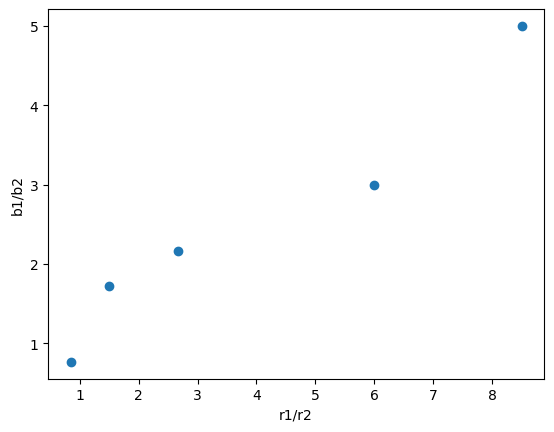

In [15]:
# graficar la razón de b1/b2 vs r1/r2
plt.scatter(matching_data['r1']/matching_data['r2'], matching_data['b1']/matching_data['b2'])
plt.ylabel('b1/b2')
plt.xlabel('r1/r2')

Text(0.5, 0, 'log10 (r1/r2)')

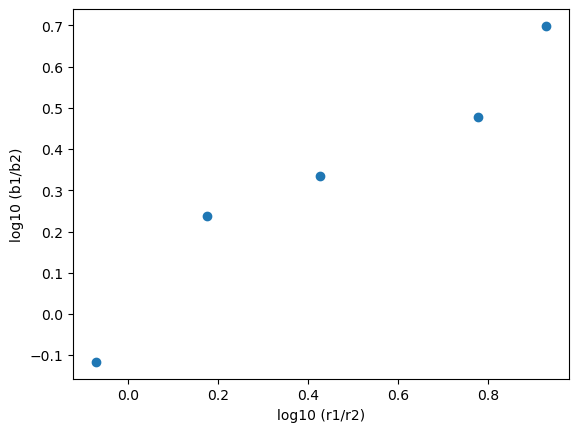

In [18]:
# graficar log10(b1/b2) vs log10(r1/r2)
plt.scatter(np.log10(matching_data['r1']/matching_data['r2']), 
            np.log10(matching_data['b1']/matching_data['b2']))
plt.ylabel('log10 (b1/b2)')
plt.xlabel('log10 (r1/r2)')

Los datos no son enteramente lineales, pero se puede ajustar un modelo lineal a los datos. En este caso, el modelo lineal es una aproximación de los datos, y no necesaraimente representa el proceso real suyacente. Sin embargo, el modelo lineal puede ser útil para predecir el comportamiento de un estudiante en el futuro, o para comparar el comportamiento de un estudiante con el de otros estudiantes, en la medida en que el modelo lineal no varíe mucho de los datos reales.

Vamos a ajustar un modelo lineal con la siguiente forma:

$$
 \log_{10}(B_1/B_2) = a + b \log_{10}(R_1/R_2)
$$

In [21]:
# ajustar una recta a los datos, basado en el modelo lineal log10(b1/b2) = a + b log10(r1/r2)
# cargamos la librería statsmodels
import statsmodels.api as sm

# ajustamos el modelo
x = np.log10(matching_data['r1']/matching_data['r2'])
X = sm.add_constant(x)
y = np.log10(matching_data['b1']/matching_data['b2'])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     41.47
Date:                Tue, 20 Jun 2023   Prob (F-statistic):            0.00759
Time:                        22:49:00   Log-Likelihood:                 6.1845
No. Observations:                   5   AIC:                            -8.369
Df Residuals:                       3   BIC:                            -9.150
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.064      0.170      0.8

/home/mrrobot/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


La parte `sm.add_constant` agrega una columna de unos a la matriz de datos, para que el modelo lineal pueda estimar el intercepto $a$. Si no se agregara esta columna, el modelo lineal estimaría el intercepto como cero.

